In [1]:
import numpy as np
from scipy.signal import chirp, spectrogram
import simpleaudio as sa
from scipy.io.wavfile import write, read
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt
from transmitter import *
from reciever import *
import random

In [2]:
fs = 44100
class OFDM:
    pass
ofdm = OFDM()
ofdm.N = 2048                   # Length of DTF
ofdm.start_bin = 50
ofdm.end_bin = 788
ofdm.CP = 256                      
ofdm.sfp = 60                   # Symbols per frame

ofdm.num_tones = 21             # Number of pilot tones
ofdm.pilot_locs = np.int64(np.linspace(49,789,ofdm.num_tones))     # Pilot locations
ofdm.pilot_vals = np.array([1+1j]*21)

ofdm.rate = "1/2"
ofdm.z = 81

ofdm.bps = 2                    # bits per symbol QFSK
ofdm.spb = 720                  # data symbols per block
ofdm.preamb = ofdm.N//2
ofdm.QFSK_dict = {              # The constellation
    (1,1) : -1-1j,
    (1,0) :  1-1j,
    (0,0) :  1+1j,
    (0,1) : -1+1j}

39384 b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x01,\x01,\x00\x00\xff\xe1\x00\x8cExif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x05\x01\x12\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x01\x1a\x00\x05\x00\x00\x00\x01\x00\x00\x00J\x01\x1b\x00\x05\x00\x00\x00\x01\x00\x00\x00R\x01(\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x00Z\x00\x00\x00\x00\x00\x00\x01,\x00\x00\x00\x01\x00\x00\x01,\x00\x00\x00\x01\x00\x03\xa0\x01\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\xa0\x02\x00\x04\x00\x00\x00\x01\x00\x00\x03\x8d\xa0\x03\x00\x04\x00\x00\x00\x01\x00\x00\x01\xff\x00\x00\x00\x00\xff\xed\x008Photoshop 3.0\x008BIM\x04\x04\x00\x00\x00\x00\x00\x008BIM\x04%\x00\x00\x00\x00\x00\x10\xd4\x1d\x8c\xd9\x8f\x00\xb2\x04\xe9\x80\t\x98\xec\xf8B~\xff\xc0\x00\x11\x08\x01\xff\x03\x8d\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04

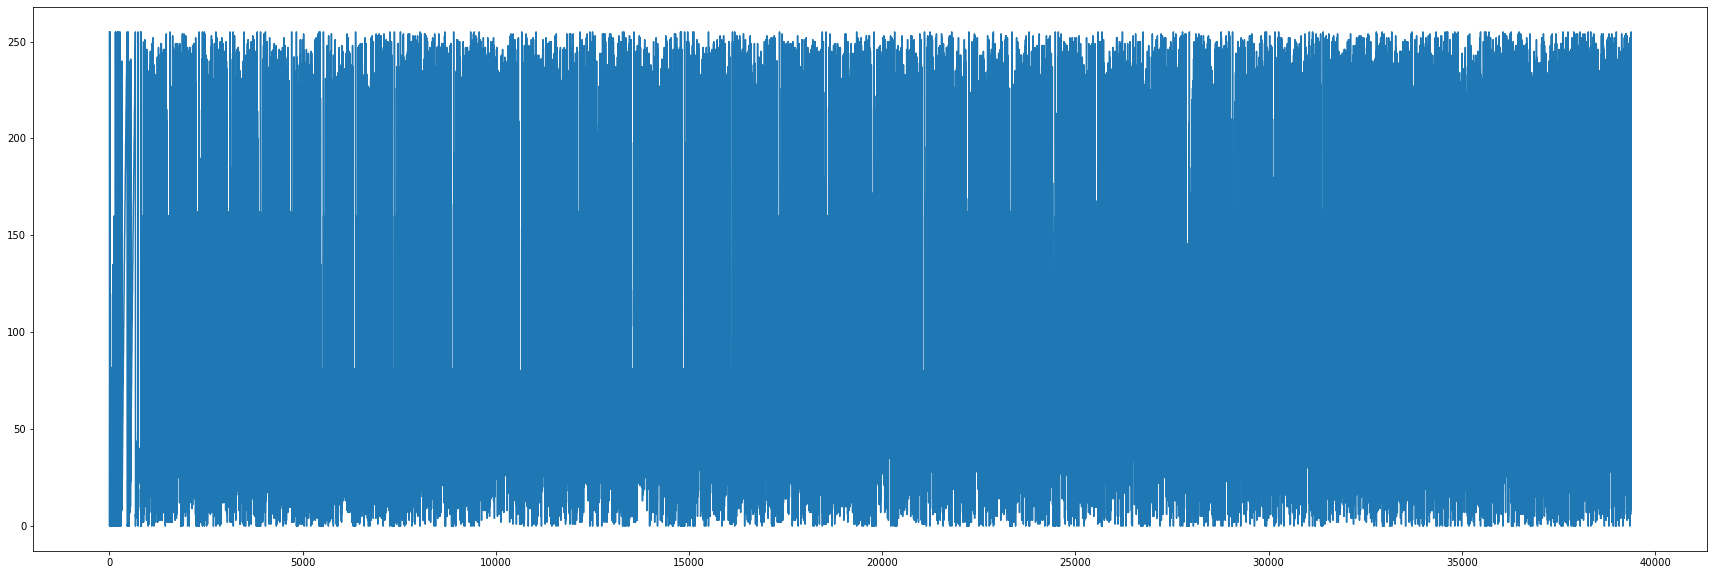

In [9]:
f = open("pitbull.jpg", "rb")
bytes = f.read()
print(len(bytes),bytes)
plt.figure(figsize = (30, 10))

byte_array = [i for i in bytes]
print(byte_array)
plt.plot(byte_array)
bin_byte_array = ["{0:08b}".format(i) for i in byte_array] # Binary bytes
print(bin_byte_array)
bitty = np.array([bity for bytey in bin_byte_array for bity in bytey]).astype(int)
print(np.shape(bitty),np.shape(bitty)[0]/1440)

bit_array = bitsFromTiff('jaguar.tiff')
print('Length of bytes', len(bit_array)/8)

256
(299, 2304)


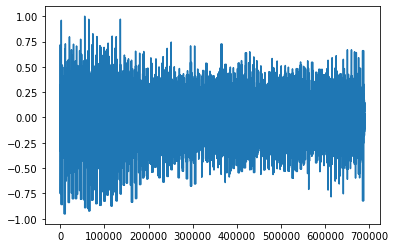

In [10]:
payload = fullTrans(bit_array, ofdm, ldpc_encode=True)
payload = payload / np.max(np.abs(payload.flatten()))
plt.plot((payload.flatten()))
print(np.shape(payload))

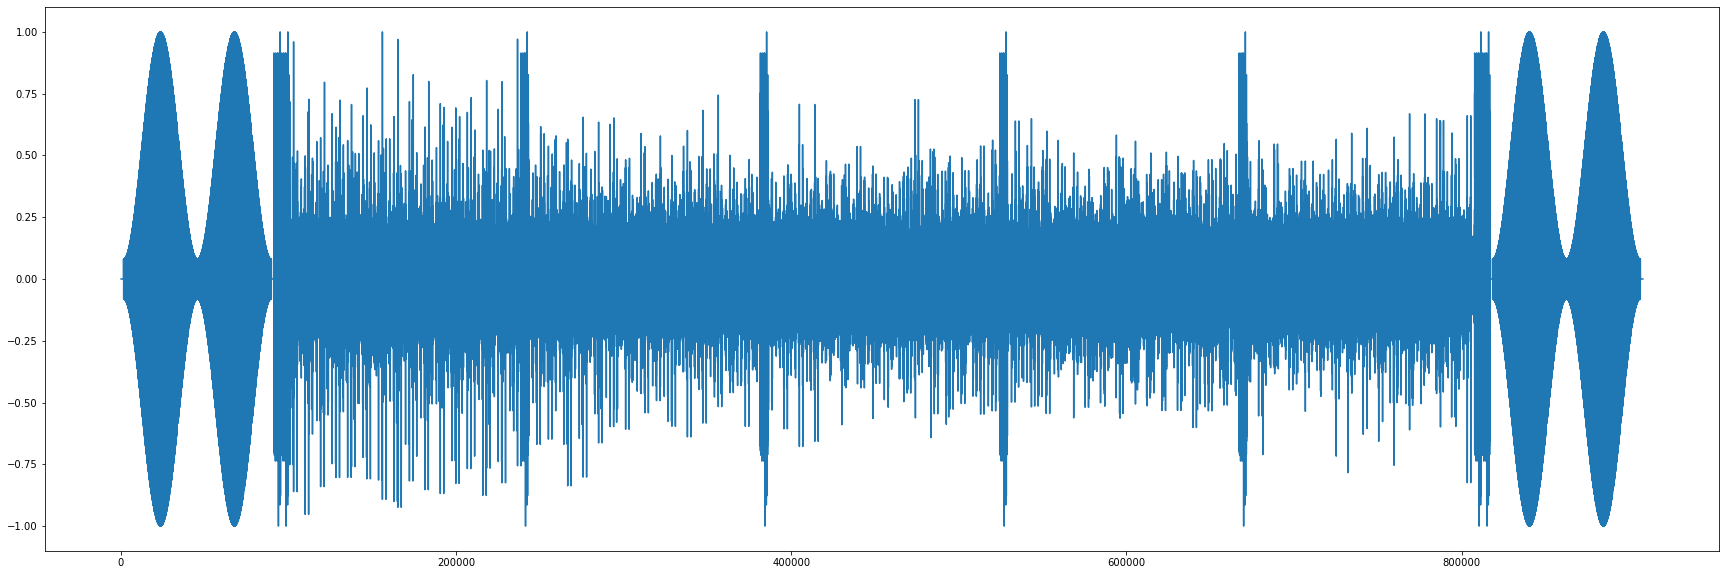

In [12]:
x = CUSTARD(payload, ofdm)
plt.figure(figsize = (30, 10))
plt.plot(x)
audioMaker(x, 'jagfinal', fs)
plt.show()


In [6]:
49147736/256

191983.34375